In [106]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import pandas as pd
from copy import deepcopy

In [7]:
from sklearn.metrics import r2_score

# Linear Model to fit the curve

In [31]:
training_subset_length = 450
hist_len = 15
total_data_length = round(training_subset_length/10) +20
alpha = 0.05

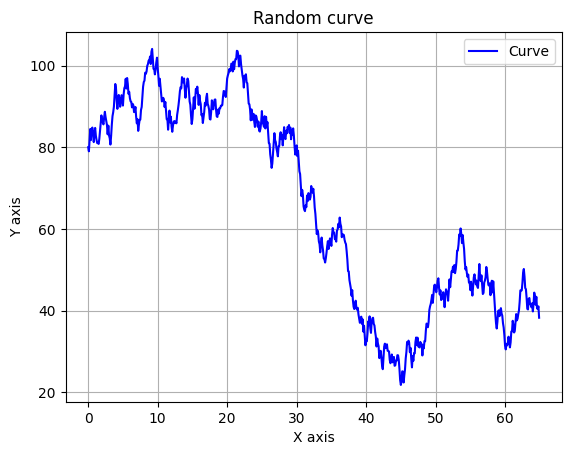

In [9]:
X = np.arange(0, total_data_length, 0.1).reshape(-1, 1)
Y = []
y = rd.randint(50, 100)
for i in range(len(X)):
    y += rd.uniform(-3, 3)
    Y.append(y)


plt.plot(X, Y, color='b', label='Curve')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Random curve")
plt.grid()
plt.legend()
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
print(len(X))
print(X.shape)

650
(650, 1)


In [12]:
LR = LinearRegression()
LR.fit(X[:training_subset_length], Y[:training_subset_length])

LinearRegression()

In [13]:
a = LR.coef_
b = LR.intercept_

y_pred_LR = LR.predict(X)

print(f"R2 score on the trained part of the curve of {r2_score(Y[:training_subset_length], y_pred_LR[:training_subset_length])}")
print(f"R2 score on the untrained part of the of {r2_score(Y[training_subset_length:], y_pred_LR[training_subset_length:])}")
print(f"Coefficient: {a}")
print(f"Intercept: {b}")

R2 score on the trained part of the curve of 0.667292495424328
R2 score on the untrained part of the of -3.504031936944121
Coefficient: [-1.39635465]
Intercept: 107.22630575750632


### Adding a prediction interval

In [14]:
# Prediction region

res = Y - y_pred_LR
qt = np.quantile(res, 1 - alpha)

# Need to check type of qt

upper_LR = [y_pred_LR[i] + qt if qt > 0 else y_pred_LR[i] - qt for i in range(len(y_pred_LR))]
lower_LR = [y_pred_LR[i] - qt if qt > 0 else y_pred_LR[i] + qt for i in range(len(y_pred_LR))]

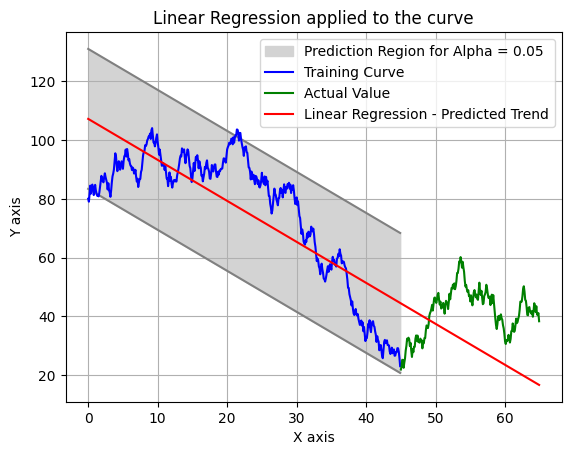

In [15]:
lr = []
for i in range(len(X)):
    lr.append(a*X[i] + b)

plt.plot(X[:training_subset_length], upper_LR[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower_LR[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper_LR[:training_subset_length], lower_LR[:training_subset_length], color='lightgrey', label=f'Prediction Region for Alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, lr, color='r', label='Linear Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Linear Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()


# Ensemble model to fit the curve - Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor()
RF.fit(X[:training_subset_length], Y[:training_subset_length])

RandomForestRegressor()

In [18]:
y_pred_RF = RF.predict(X)

print(f"R2 score on the trained part of the curve (0 <= X <= 100): {r2_score(Y[:training_subset_length], y_pred_RF[:training_subset_length])}")
print(f"R2 score on the untrained part of the curve (100 <= X <= 200): {r2_score(Y[training_subset_length:], y_pred_RF[training_subset_length:])}")

# Prediction region

res = Y - y_pred_RF
qt = np.quantile(res, 1 - alpha)

# Need to check type of qt

upper_RF = [y_pred_RF[i] + qt if qt > 0 else y_pred_RF[i] - qt for i in range(len(y_pred_RF))]
lower_RF = [y_pred_RF[i] - qt if qt > 0 else y_pred_RF[i] + qt for i in range(len(y_pred_RF))]

R2 score on the trained part of the curve (0 <= X <= 100): 0.9995038861355133
R2 score on the untrained part of the curve (100 <= X <= 200): -4.588842681718515


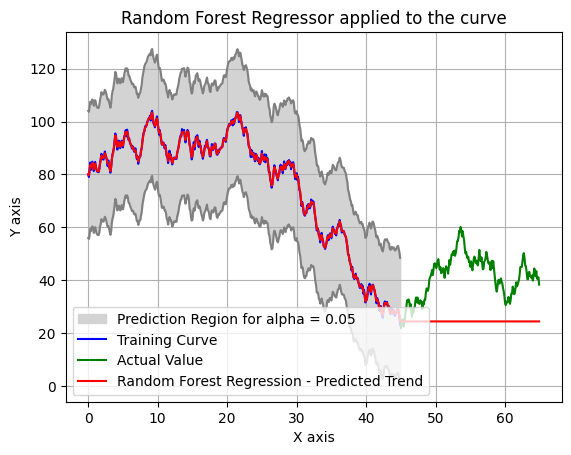

In [19]:
plt.plot(X[:training_subset_length], upper_RF[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower_RF[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper_RF[:training_subset_length], lower_RF[:training_subset_length], color='lightgrey', label=f'Prediction Region for alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, y_pred_RF, color='r', label='Random Forest Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Random Forest Regressor applied to the curve")
plt.grid()
plt.legend()
plt.show()

# Non-linear model to fit the curve - Multi Linear Perceptron Regression

In [20]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(hidden_layer_sizes=(1500, 750, 500, 250, 100, 10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 max_iter=1000,tol=1e-4)
MLPR.fit(X[:training_subset_length], Y[:training_subset_length])


MLPRegressor(hidden_layer_sizes=(1500, 750, 500, 250, 100, 10), max_iter=1000)

In [21]:
y_pred_MLP = MLPR.predict(X)

In [22]:
print(f"R2 score on the trained part of the curve (0 <= X <= 100): {r2_score(Y[:training_subset_length], y_pred_MLP[:training_subset_length])}")
print(f"R2 score on the untrained part of the curve (100 <= X <= 200): {r2_score(Y[training_subset_length:], y_pred_MLP[training_subset_length:])}")

R2 score on the trained part of the curve (0 <= X <= 100): 0.9579428185588965
R2 score on the untrained part of the curve (100 <= X <= 200): -10.344613142289214


In [23]:
# Prediction region

res = Y - y_pred_MLP
qt = np.quantile(res, 1 - alpha)

upper_MLP = [y_pred_MLP[i] + qt if qt > 0 else y_pred_MLP[i] - qt for i in range(len(y_pred_MLP))]
lower_MLP = [y_pred_MLP[i] - qt if qt > 0 else y_pred_MLP[i] + qt for i in range(len(y_pred_MLP))]

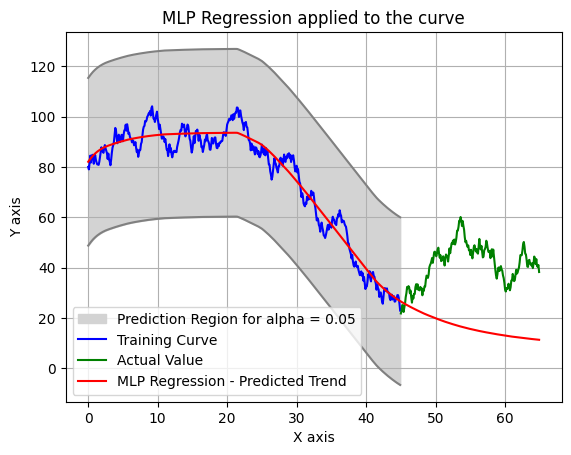

In [24]:
plt.plot(X[:training_subset_length], upper_MLP[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower_MLP[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper_MLP[:training_subset_length], lower_MLP[:training_subset_length], color='lightgrey', label=f'Prediction Region for alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, y_pred_MLP, color='r', label='MLP Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("MLP Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()


The predictions are too hasardous. Sometimes they fit, sometimes not at all. We need to find a more reliable model. Of course, we didn't work on the data itself before, so we can't be expected too good and reliable results.

**Idea: Could be good to mix Random Forest with MLP to obtain a more accurate model. Need to find out how to put all that into an equation to do some forecasting**

### 1. Combining RF and MLP with weights

In [25]:
RF_weight = 0.6

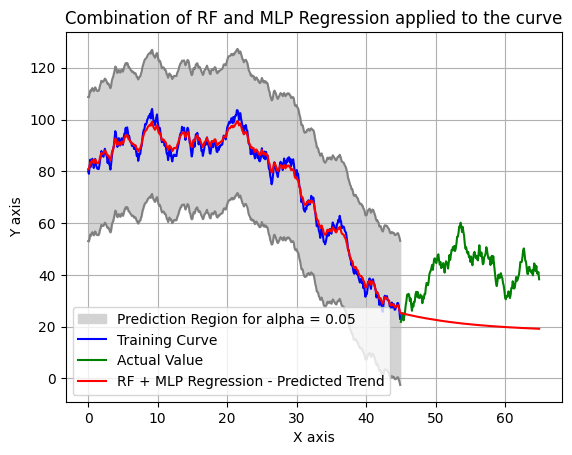

In [26]:
weighted_upper_RF = [RF_weight*i for i in upper_RF]
weighted_upper_MLP = [(1 - RF_weight)*i for i in upper_MLP]
weighted_lower_RF = [RF_weight*i for i in lower_RF]
weighted_lower_MLP = [(1 - RF_weight)*i for i in lower_MLP]

y_pred = RF_weight*y_pred_RF + (1 - RF_weight)*y_pred_MLP

res = Y - y_pred
qt = np.quantile(res, 1 - alpha)

upper = [y_pred[i] + qt if qt > 0 else y_pred[i] - qt for i in range(len(y_pred))]
lower = [y_pred[i] - qt if qt > 0 else y_pred[i] + qt for i in range(len(y_pred))]

plt.plot(X[:training_subset_length], upper[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper[:training_subset_length], lower[:training_subset_length], color='lightgrey', label=f'Prediction Region for alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, y_pred, color='r', label='RF + MLP Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Combination of RF and MLP Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()

The forecasting doesn't work any better. Morover, if the model works well on training data, the prediction region is huge, which means either one of two things:
- The prediction confidence interval calculation is wrong for the combination - TBD
- Combining two models adds much more uncertainty - which is not what we want.

Perhaps, to make the forecasting work, we can integrate a "history notion to the data".

To do that, we can proceed as follows:
- Compute the difference between the previous value of Y and the current one. This can help the model learn patterns in short trends.
- Evaluate the last ten values, so that the trend is at longer term - and the forecasting may improve. The model should learn patterns on the general aspect of the curve. To do this, we can create a deque (double ended queue) for each data point.

In [164]:
Xf = [[X[i][0], Y[i-1] - Y[i-2], Y[i-1], Y[i-2], Y[i-3], Y[i-4], Y[i-5], Y[i-6], Y[i-7], Y[i-8], Y[i-9], Y[i-10], Y[i-11], Y[i-12], Y[i-13], Y[i-14], Y[i-15]] for i in range(hist_len, training_subset_length)]

In [165]:
print((Xf))

[[np.float64(1.5), 0.04000075489149424, 81.07722494561001, 81.03722419071852, 81.83940850176594, 82.85648844658769, 84.75268699845182, 83.26084268272196, 81.27921429130728, 83.73474384643661, 84.83907889534174, 84.3792328321579, 81.77885301379368, 84.49110692251786, 81.77908214710544, 79.02777304848857, 80.02313241375396], [np.float64(1.6), -0.24116657828973587, 80.83605836732028, 81.07722494561001, 81.03722419071852, 81.83940850176594, 82.85648844658769, 84.75268699845182, 83.26084268272196, 81.27921429130728, 83.73474384643661, 84.83907889534174, 84.3792328321579, 81.77885301379368, 84.49110692251786, 81.77908214710544, 79.02777304848857], [np.float64(1.7000000000000002), 1.2312592423975133, 82.06731760971779, 80.83605836732028, 81.07722494561001, 81.03722419071852, 81.83940850176594, 82.85648844658769, 84.75268699845182, 83.26084268272196, 81.27921429130728, 83.73474384643661, 84.83907889534174, 84.3792328321579, 81.77885301379368, 84.49110692251786, 81.77908214710544], [np.float64(

In [166]:
Xdf = pd.DataFrame(Xf)
print(len(Xdf))
Xdf.head()

435


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.5,0.040001,81.077225,81.037224,81.839409,82.856488,84.752687,83.260843,81.279214,83.734744,84.839079,84.379233,81.778853,84.491107,81.779082,79.027773,80.023132
1,1.6,-0.241167,80.836058,81.077225,81.037224,81.839409,82.856488,84.752687,83.260843,81.279214,83.734744,84.839079,84.379233,81.778853,84.491107,81.779082,79.027773
2,1.7,1.231259,82.067318,80.836058,81.077225,81.037224,81.839409,82.856488,84.752687,83.260843,81.279214,83.734744,84.839079,84.379233,81.778853,84.491107,81.779082
3,1.8,1.921543,83.988861,82.067318,80.836058,81.077225,81.037224,81.839409,82.856488,84.752687,83.260843,81.279214,83.734744,84.839079,84.379233,81.778853,84.491107
4,1.9,1.676516,85.665377,83.988861,82.067318,80.836058,81.077225,81.037224,81.839409,82.856488,84.752687,83.260843,81.279214,83.734744,84.839079,84.379233,81.778853


In [99]:
print(len(Xdf) == len(Y[hist_len:training_subset_length]))
Xdf.isnull().sum()

True


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [135]:
RF = RandomForestRegressor()
RF.fit(Xf[:training_subset_length], Y[hist_len:training_subset_length])

RandomForestRegressor()

In [167]:
steps = 150
print(Xf)

[[np.float64(1.5), 0.04000075489149424, 81.07722494561001, 81.03722419071852, 81.83940850176594, 82.85648844658769, 84.75268699845182, 83.26084268272196, 81.27921429130728, 83.73474384643661, 84.83907889534174, 84.3792328321579, 81.77885301379368, 84.49110692251786, 81.77908214710544, 79.02777304848857, 80.02313241375396], [np.float64(1.6), -0.24116657828973587, 80.83605836732028, 81.07722494561001, 81.03722419071852, 81.83940850176594, 82.85648844658769, 84.75268699845182, 83.26084268272196, 81.27921429130728, 83.73474384643661, 84.83907889534174, 84.3792328321579, 81.77885301379368, 84.49110692251786, 81.77908214710544, 79.02777304848857], [np.float64(1.7000000000000002), 1.2312592423975133, 82.06731760971779, 80.83605836732028, 81.07722494561001, 81.03722419071852, 81.83940850176594, 82.85648844658769, 84.75268699845182, 83.26084268272196, 81.27921429130728, 83.73474384643661, 84.83907889534174, 84.3792328321579, 81.77885301379368, 84.49110692251786, 81.77908214710544], [np.float64(

In [168]:
print(Xf[0])
print(np.array(Xf[0]).reshape(-1, 17))

[np.float64(1.5), 0.04000075489149424, 81.07722494561001, 81.03722419071852, 81.83940850176594, 82.85648844658769, 84.75268699845182, 83.26084268272196, 81.27921429130728, 83.73474384643661, 84.83907889534174, 84.3792328321579, 81.77885301379368, 84.49110692251786, 81.77908214710544, 79.02777304848857, 80.02313241375396]
[[1.50000000e+00 4.00007549e-02 8.10772249e+01 8.10372242e+01
  8.18394085e+01 8.28564884e+01 8.47526870e+01 8.32608427e+01
  8.12792143e+01 8.37347438e+01 8.48390789e+01 8.43792328e+01
  8.17788530e+01 8.44911069e+01 8.17790821e+01 7.90277730e+01
  8.00231324e+01]]


In [121]:
test_y = RF.predict(np.array(Xf[0]).reshape(-1, 17))

In [169]:
Y_pred = deepcopy(Y[hist_len:training_subset_length])
X_for_pred = deepcopy(Xf[:training_subset_length])

for i in range(0, steps):
    X_for_pred.append([X_for_pred[i-1][0]+ 0.1, Y_pred[i-1] - Y_pred[i-2], Y_pred[i-1], Y_pred[i-2], Y_pred[i-3], Y_pred[i-4], Y_pred[i-5], Y_pred[i-6], Y_pred[i-7],
                        Y_pred[i-8], Y_pred[i-9], Y_pred[i-10], Y_pred[i-11], Y_pred[i-12], Y_pred[i-13], Y_pred[i-14], Y_pred[i-15]])
    Y_pred.append((RF.predict(np.array(X_for_pred[i]).reshape(-1, 17)))[0])

In [170]:
print(len(X_for_pred))
print(len(Xf)+steps)
print()

585
585



In [171]:
print(Y_pred)

[80.83605836732028, 82.06731760971779, 83.98886066215468, 85.66537702876805, 87.81688697454302, 86.43222991358253, 86.01469200745774, 85.61360205614609, 87.43478075474864, 88.69753157681903, 87.41506196267912, 86.50753208848471, 85.46212684025119, 83.18125332837306, 85.31000376331245, 82.88949365932412, 82.21238227750757, 80.67933138204901, 82.8179493463405, 85.5658248492617, 87.64425540054219, 88.61501054743181, 89.96965012248486, 92.83873028855962, 95.50089862451135, 94.4678465668663, 91.53419021998715, 89.41640526054279, 91.56713681454016, 92.81034229029325, 91.8672052849599, 89.93528352457321, 91.10986734371139, 92.76232655345848, 92.46221690913819, 90.21988706961763, 92.9182287663877, 94.47658385577007, 94.92351523867188, 96.7726100976162, 94.38780233856107, 96.96563085857402, 95.5069462979135, 93.09516707897446, 93.5960688365736, 92.04821233668983, 91.26378789181642, 91.12488062807421, 89.78600364123722, 90.63525822443655, 90.29071775914757, 88.61469685444047, 88.87844103802892, 

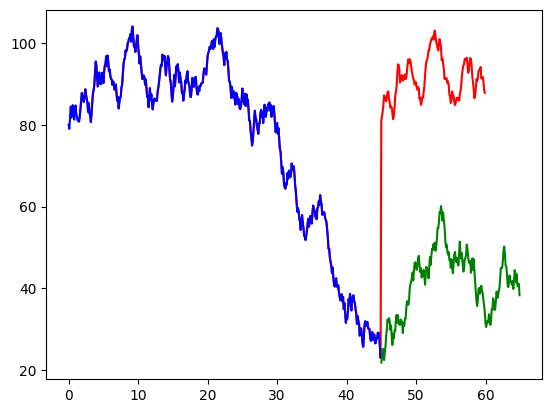

In [172]:
X_values = []
for i in range(15, training_subset_length+steps):
    X_values.append(0.1*i)

plt.plot(X_values, Y_pred, color='r')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.show()

Here we see that the Random Forest Regressor is able to forecast a pattern which seems identical to the initial pattern. We are going towards the right direction but still have issues with the fact that there is no continuity with what came just before, which is not what we intended when taking the last values of Y.

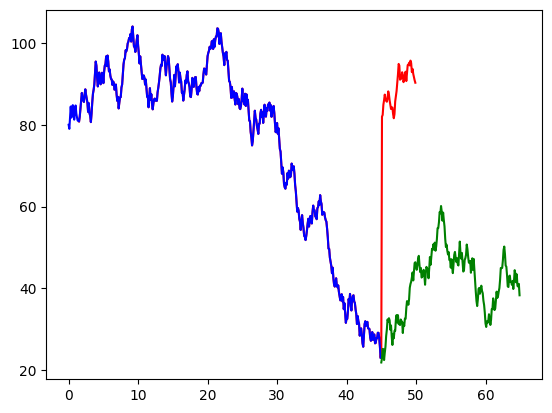

In [205]:
Xf = [[X[i][0], Y[i-1] - Y[i-2]] for i in range(hist_len, training_subset_length)]

RF = RandomForestRegressor()
RF.fit(Xf[:training_subset_length], Y[hist_len:training_subset_length])

Y_pred = deepcopy(Y[hist_len:training_subset_length])
X_for_pred = deepcopy(Xf[:training_subset_length])

for i in range(0, steps):
    X_for_pred.append([X_for_pred[i-1][0]+ 0.1, Y_pred[i-1]-Y[i-2]])
    Y_pred.append((RF.predict(np.array(X_for_pred[i-1]).reshape(-1, 2)))[0])

X_values = []
for i in range(15, training_subset_length+steps):
    X_values.append(0.1*i)

plt.plot(X_values, Y_pred, color='r')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.show()

Same phenomenon when taking only the difference between the two last values.

In [196]:
steps = 50

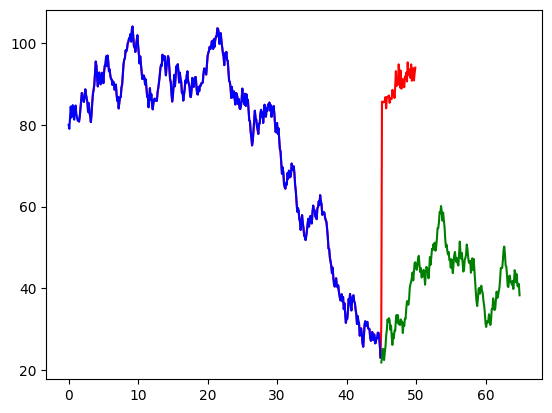

In [201]:
from sklearn.neural_network import MLPRegressor

Xf = [[X[i][0], Y[i-1] - Y[i-2]] for i in range(hist_len, training_subset_length)]

MLPR = MLPRegressor(hidden_layer_sizes=(1500, 750, 500, 250, 100, 10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 max_iter=1000,tol=1e-4)

MLPR.fit(Xf[:training_subset_length], Y[hist_len:training_subset_length])

Y_pred = deepcopy(Y[hist_len:training_subset_length])
X_for_pred = deepcopy(Xf[:training_subset_length])

for i in range(0, steps):
    X_for_pred.append([X_for_pred[i-1][0]+ 0.1, Y_pred[i-1]-Y_pred[i-2]])
    Y_pred.append((MLPR.predict(np.array(X_for_pred[i-1]).reshape(-1, 2)))[0])

X_values = []
for i in range(15, training_subset_length+steps):
    X_values.append(0.1*i)

plt.plot(X_values, Y_pred, color='r')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.show()

435
[np.float64(44.900000000000006), -2.2149284082920886]
[np.float64(45.00000000000001), -2.7670345908566496]
22.996648180173878
31.17226232861606
755.7069522114837


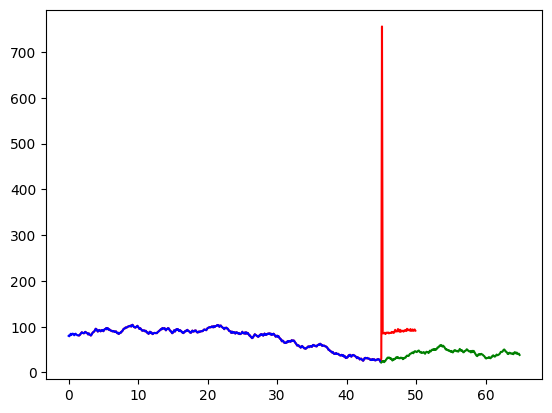

In [203]:
Y_pred = deepcopy(Y[hist_len:training_subset_length])
X_for_pred = deepcopy(Xf[:training_subset_length])

print(len(Y_pred))


for i in range(0, steps):
    X_for_pred.append([X_for_pred[i-1][0]+ 0.1, Y_pred[i-1]-Y_pred[i-2]])
    Y_pred.append((MLPR.predict(np.array(X_for_pred[-1]).reshape(-1, 2)))[0])
    
print(X_for_pred[434])
print(X_for_pred[435])

print(Y_pred[434])
print(Y_pred[435])
print(Y_pred[436])

X_values = []
for i in range(15, training_subset_length+steps):
    X_values.append(0.1*i)

plt.plot(X_values, Y_pred, color='r')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.show()